Data Exploration and Initial Data Cleaning Notebook
MRP 2023 - Felix Li

In [1]:
import json
import pandas as pd
import numpy as np
import os

Import files downloaded from dataset and convert to dataframe

In [2]:
grades_raw = open("grades_data.json")
code_raw = open("programming_data.json")

In [3]:
grades_raw = json.load(grades_raw)
code_raw = json.load(code_raw)

In [4]:
df_grades = pd.json_normalize(grades_raw)
df_code = pd.json_normalize(code_raw)

In [5]:
df_grades.head()

,exam_week,academic_year_1,academic_year_0,module,grade,user
0,12,2016,2015,ca114,40,e45f938b-9d5c-4838-86ce-0755e3c97053
1,12,2016,2015,ca114,60,91b06877-f0e0-4af9-bbd4-b20ffa90e36b
2,12,2016,2015,ca114,60,b9e7e608-6036-4d44-8770-a7036176b53c
3,12,2016,2015,ca114,100,78cd7f00-c86a-46a4-ab20-040f317a60ca
4,12,2016,2015,ca114,60,80965c2d-45d9-440d-b3c3-403c112145e9


Based on the below preview - the columns we are most interested in would be the "upload" column

In [6]:
df_code.head()

,academic_year_1,task,user,extension,ip,date,academic_year_0,upload,module,correct
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,py,,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True


In [7]:
df_code.shape

(591707, 10)

In [8]:
df_grades.shape

(2774, 6)

In [9]:
import matplotlib.pyplot as plt

In [10]:
df_grades.describe()

,exam_week,academic_year_1,academic_year_0,grade
count,2774.000000,2774.000000,2774.000000,2774.000000
mean,8.653929,2017.149964,2016.149964,53.357246
std,3.066152,0.795229,0.795229,34.057497
min,4.000000,2016.000000,2015.000000,0.000000
25%,6.000000,2016.000000,2015.000000,25.000000
50%,8.000000,2017.000000,2016.000000,50.000000
75%,12.000000,2018.000000,2017.000000,80.000000
max,12.000000,2018.000000,2017.000000,100.000000


In [11]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591707 entries, 0 to 591706
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   academic_year_1  591707 non-null  object
 1   task             591707 non-null  object
 2   user             591707 non-null  object
 3   extension        591707 non-null  object
 4   ip               591707 non-null  object
 5   date             591707 non-null  object
 6   academic_year_0  591707 non-null  object
 7   upload           591707 non-null  object
 8   module           591707 non-null  object
 9   correct          591707 non-null  bool  
dtypes: bool(1), object(9)
memory usage: 41.2+ MB


Looks like some of the assignments were in bash, haskell and perl - these will be out of scope for this experiment

In [12]:
df_code["extension"].value_counts()

py    490829
sh     85381
hs     15381
pl       103
          13
Name: extension, dtype: int64

Some of the blank attributes are actually not NaN or Null but blanks as per below

In [13]:
df_code[df_code['extension']==""].count()

academic_year_1    13
task               13
user               13
extension          13
ip                 13
date               13
academic_year_0    13
upload             13
module             13
correct            13
dtype: int64

In [14]:
df_code[df_code['upload']==""].count()

academic_year_1    953
task               953
user               953
extension          953
ip                 953
date               953
academic_year_0    953
upload             953
module             953
correct            953
dtype: int64

In [15]:
df_code[df_code['correct']==""].count()

academic_year_1    0
task               0
user               0
extension          0
ip                 0
date               0
academic_year_0    0
upload             0
module             0
correct            0
dtype: int64

Drop non-python submissions and blank submissions

In [16]:
df_code_py = df_code[(df_code["extension"] == "py") & (df_code['upload']!="")]

In [17]:
df_code_py.drop(columns=["extension", "ip"], inplace=True)

C:\Users\felix\AppData\Local\Temp\ipykernel_18712\3702918823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py.drop(columns=["extension", "ip"], inplace=True)


In [18]:
df_code_py

,academic_year_1,task,user,date,academic_year_0,upload,module,correct
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True
...,...,...,...,...,...,...,...,...
591702,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:26,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,False
591703,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:45,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True
591704,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:56:12,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True
591705,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:56:12,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True


Checking to see if the python dataset is balanced and if there are any outliers we should consider excluding

In [19]:
# the dataset appears to be balanced therefore reducing our steps for data cleaning
df_code["correct"].value_counts()

False    358557
True     233150
Name: correct, dtype: int64

In [20]:
df_grades["academic_year_0"].value_counts()

2017    1116
2016     958
2015     700
Name: academic_year_0, dtype: int64

In [21]:
df_code_py["academic_year_0"].value_counts()

2017    261248
2016    217328
2015     11410
2018         9
Name: academic_year_0, dtype: int64

In [22]:
df_code_py["module"].value_counts()

ca117    167672
ca116    143614
ca177     81077
ca277     59895
ca278     37481
ca000       145
ca114       106
ca247         3
ca320         2
Name: module, dtype: int64

In [23]:
df_grades["module"].value_counts()

ca116    1036
ca117     874
ca114     411
ca277     259
ca278     194
Name: module, dtype: int64

In [24]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   exam_week        2774 non-null   int64 
 1   academic_year_1  2774 non-null   int64 
 2   academic_year_0  2774 non-null   int64 
 3   module           2774 non-null   object
 4   grade            2774 non-null   int64 
 5   user             2774 non-null   object
dtypes: int64(4), object(2)
memory usage: 130.2+ KB


In [25]:
df_code_py.describe()

,academic_year_1,task,user,date,academic_year_0,upload,module,correct
count,489995,489995,489995,489995,489995,489995,489995,489995
unique,4,909,533,340788,4,331677,9,2
top,2018,stableford_122.py,4a1f2726-b713-40f0-b544-9de55d617a12,2016-10-12 21:44:54,2017,"print ""hello""\n",ca117,False
freq,261248,3719,7500,19,261248,363,167672,295517


In [26]:
df_code_py.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489995 entries, 0 to 591706
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   academic_year_1  489995 non-null  object
 1   task             489995 non-null  object
 2   user             489995 non-null  object
 3   date             489995 non-null  object
 4   academic_year_0  489995 non-null  object
 5   upload           489995 non-null  object
 6   module           489995 non-null  object
 7   correct          489995 non-null  bool  
dtypes: bool(1), object(7)
memory usage: 30.4+ MB


Taking a look at the grades dataframe - the data here will not be used in the main part of this experiment but may be used in the dashboard solution

[Text(0, 0, '353'),
 Text(0, 0, '154'),
 Text(0, 0, '322'),
 Text(0, 0, '127'),
 Text(0, 0, '228'),
 Text(0, 0, '336'),
 Text(0, 0, '151'),
 Text(0, 0, '353'),
 Text(0, 0, '125'),
 Text(0, 0, '625')]

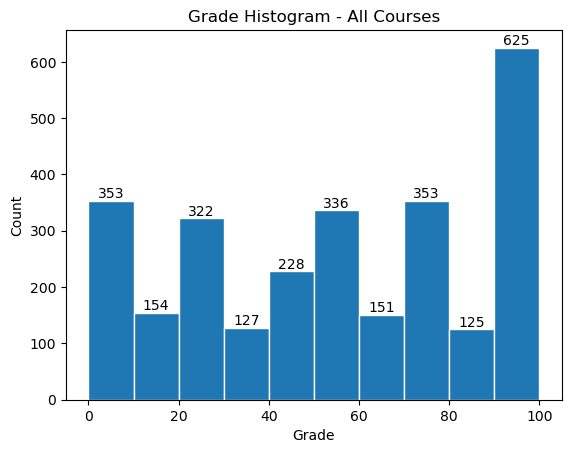

In [27]:
val, bin, bar = plt.hist(df_grades["grade"], label="Inline label", ec="white")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Grade Histogram - All Courses")
plt.bar_label(bar, fontsize=10, c="black")

Taking a look at how a single student would look like in the grades dataframe

In [28]:
df_grades[df_grades["user"]=="e45f938b-9d5c-4838-86ce-0755e3c97053"]

,exam_week,academic_year_1,academic_year_0,module,grade,user
0,12,2016,2015,ca114,40,e45f938b-9d5c-4838-86ce-0755e3c97053
70,6,2016,2015,ca114,20,e45f938b-9d5c-4838-86ce-0755e3c97053
2321,12,2017,2016,ca277,10,e45f938b-9d5c-4838-86ce-0755e3c97053
2580,6,2017,2016,ca278,26,e45f938b-9d5c-4838-86ce-0755e3c97053
2636,12,2017,2016,ca278,67,e45f938b-9d5c-4838-86ce-0755e3c97053


In [29]:
df_grades[df_grades["user"]=="91b06877-f0e0-4af9-bbd4-b20ffa90e36b"]

,exam_week,academic_year_1,academic_year_0,module,grade,user
1,12,2016,2015,ca114,60,91b06877-f0e0-4af9-bbd4-b20ffa90e36b
71,6,2016,2015,ca114,20,91b06877-f0e0-4af9-bbd4-b20ffa90e36b


In [30]:
df_grades[df_grades["user"]=="78cd7f00-c86a-46a4-ab20-040f317a60ca"]

,exam_week,academic_year_1,academic_year_0,module,grade,user
3,12,2016,2015,ca114,100,78cd7f00-c86a-46a4-ab20-040f317a60ca
73,6,2016,2015,ca114,0,78cd7f00-c86a-46a4-ab20-040f317a60ca


Checking an example of a student assignment upload

In [31]:
df_code_py.iloc[0]["upload"]

'#!/usr/bin/env python\n\na = int(raw_input())\nb = int(raw_input())\n\nprint a + b\n\n\n'

Based on the below there are a large number of different assignments, which may complicate efforts to have one model that works for all assignments

In [32]:
df_code_py["task"].value_counts()[:5]

stableford_122.py     3719
ex3-strip-zeros.py    2830
small-primes.py       2412
ex2-third-words.py    2399
wordcomps_031.py      2203
Name: task, dtype: int64

Individual assignments can have very different results between students, the model needs to be able to compensate for that

In [33]:
df_code_py[df_code_py["task"]=="stableford_122.py"].iloc[0]["upload"]

"import sys\n\n# Careful here: return in a finally eats the exception\ndef calc_points(par, net_strokes):\n    try:\n        points = par - int(net_strokes) + 2\n        return (points > 0) * points\n    except ValueError:\n        if net_strokes == 'X':\n            return 0\n        raise\n\ndef print_results(results, maxwidth):\n    if not results:\n        return\n    sorted_results = sorted(results, key=lambda x:x[-1], reverse=True)\n    for (n, p) in sorted_results:\n        print('{:>{:d}s} : {:2d}'.format(n, maxwidth, p))\n\ndef print_disqualified(disqualified, maxwidth):\n    for (n, p) in disqualified:\n        print('{:>{:d}s} : Disqualified'.format(n, maxwidth))\n\ndef main():\n\n    # List of results\n    results = []\n    disqualified = []\n\n    # Grab pars and indices\n    pars = [int(x) for x in sys.stdin.readline().strip().split()]\n    indices = [int(x) for x in sys.stdin.readline().strip().split()]\n\n    # Go through remaining lines    \n    for line in sys.stdin:\

In [34]:
df_code_py[df_code_py["task"]=="stableford_122.py"].iloc[100]["upload"]

'import sys\n\nd = {}\n\ndef longest_name(d):\n  longest = [n for n in d.keys()]\n  biggest = max(longest, key=len)\n  return len(biggest)\n\ndef point_calc(s):\n  if s <= -4:\n      return 6\n  elif s == -3:\n      return 5\n  elif s == -2:\n      return 4\n  elif s == -1:\n      return 3\n  elif s == 0:\n      return 2\n  elif s == 1:\n      return 1\n  else:\n      return 0\n\ndef score_calc(par, index, name, handicap, stroke):\n  h = int(handicap)\n  l = h + 1\n  n = list(range(1, 101))\n  total = 0\n  i = 0\n  while i < len(stroke):\n    try:\n      num = int(stroke[i])\n      if num not in n:\n        total = \'Disqualified\'\n     \n      if h >= 1 and h <=18 and int(index[i]) in range(1, l):\n        net_stroke = num - 1\n        score_to_par = net_stroke - par[i]\n        p = point_calc(score_to_par)\n        total += p\n\n      elif h >= 19 and h <= 36:\n        c = h - 18\n        if int(index[i]) in range(1, c + 1):\n          net_stroke = num - 2\n          score_to_par = 

In [35]:
import tokenize

In [36]:
import io

Some of the code are duplicate uploads at the exact same time from the same user for the same assignment - these will be removed as they do not assist in training

In [37]:
df_code_py = df_code_py.drop_duplicates(subset=["task", "user", "date"])

We will use python's own code tokenizer to process the student uploads. As it is specific to the python language, it should offer increased token relevancy compared to other more generic natural language tokenizers

In [38]:
tokens = []
token_count = []
line_count = []
token_code_only = []

for index, row in df_code_py.iterrows():
    temp_tokens = None
    t_dict = []
    t_code_only = []
    temp_lines = 0
    temp_token_count = 0
    empty_lines = 0
    with io.StringIO(row["upload"]) as f:
        line = f.readline
        temp_tokens = tokenize.generate_tokens(line)
        try:
            for token in temp_tokens:
                t_dict.append(token._asdict())
                temp_token_count += 1
                if t_dict[-1]["line"] == "\n" or t_dict[-1]["type"] == 0:
                    empty_lines += 1
                elif t_dict[-1]["type"] != 61:
                    # tokenize only the code not comments
                    t_code_only.append(t_dict[-1]["string"])
        except:
            pass
    tokens.append(t_dict)
    token_count.append(temp_token_count)
    temp_lines = t_dict[-1]["end"][0] - empty_lines
    line_count.append(temp_lines)
    token_code_only.append(t_code_only)

We will now convert some of the columns to the correct data type, as well as adding some new columns that have processed tokens for training (e.g. tokens)

In [39]:
df_code_py["date"] = pd.to_datetime(df_code_py["date"]) 

C:\Users\felix\AppData\Local\Temp\ipykernel_18712\3305286083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["date"] = pd.to_datetime(df_code_py["date"])


In [40]:
df_code_py["hour_submitted"] = df_code_py["date"].dt.hour

C:\Users\felix\AppData\Local\Temp\ipykernel_18712\665244305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["hour_submitted"] = df_code_py["date"].dt.hour


In [41]:
df_code_py["tokens"] = np.array(tokens, dtype=object)

C:\Users\felix\AppData\Local\Temp\ipykernel_18712\96055891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["tokens"] = np.array(tokens, dtype=object)


In [42]:
df_code_py["token_count"] = np.array(token_count)

C:\Users\felix\AppData\Local\Temp\ipykernel_18712\2873733347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["token_count"] = np.array(token_count)


In [43]:
df_code_py["line_count"] = np.array(line_count)

C:\Users\felix\AppData\Local\Temp\ipykernel_18712\4076580069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["line_count"] = np.array(line_count)


In [44]:
df_code_py["token_code_only"] = np.array(token_code_only)

C:\Users\felix\AppData\Local\Temp\ipykernel_18712\2847834887.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df_code_py["token_code_only"] = np.array(token_code_only)
C:\Users\felix\AppData\Local\Temp\ipykernel_18712\2847834887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["token_code_only"] = np.array(token_code_only)


The below dataframe is now ready for ingestion into the deep learning model

In [45]:
df_code_py

,academic_year_1,task,user,date,academic_year_0,upload,module,correct,hour_submitted,tokens,token_count,line_count,token_code_only
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,14,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,"[\n, a, =, int, (, raw_input, (, ), ), \n, b, ..."
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True,14,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,"[\n, a, =, str, (, raw_input, (, ), ), \n, b, ..."
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True,10,"[{'type': 61, 'string': '#!/usr/bin/env python...",7,2,"[\n, print, ""Goodbye"", \n]"
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,14,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,"[\n, a, =, int, (, raw_input, (, ), ), \n, b, ..."
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True,14,"[{'type': 61, 'string': '#!usr/bin/evn python'...",42,7,"[\n, a, =, raw_input, (, ), \n, b, =, raw_inpu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591699,2018,ex3-first-long-word.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 11:52:33,2017,#!/usr/bin/env python\n\nn = 10\nword = raw_in...,ca177,True,11,"[{'type': 61, 'string': '#!/usr/bin/env python...",36,6,"[\n, n, =, 10, \n, word, =, raw_input, (, ), \..."
591700,2018,ex3-first-long-word.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:56:07,2017,#!/usr/bin/env python\n\nn = 10\nword = raw_in...,ca177,True,12,"[{'type': 61, 'string': '#!/usr/bin/env python...",36,6,"[\n, n, =, 10, \n, word, =, raw_input, (, ), \..."
591702,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:26,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,False,12,"[{'type': 61, 'string': '#!/usr/bin/env python...",40,6,"[\n, ch, =, raw_input, (, ), \n, s, =, raw_inp..."
591703,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:45,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True,12,"[{'type': 61, 'string': '#!/usr/bin/env python...",39,6,"[\n, ch, =, raw_input, (, ), \n, s, =, raw_inp..."


We can calculate the average token per line count in order to have a baseline for window size for the CNN

In [46]:
df_code_py["token_per_line"] = df_code_py["token_count"]/df_code_py["line_count"]

C:\Users\felix\AppData\Local\Temp\ipykernel_18712\466031809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_code_py["token_per_line"] = df_code_py["token_count"]/df_code_py["line_count"]


There are certain rows that have no real code in the upload column - we will remove them from the training dataframe as they do not provide any useful information 

In [47]:
df_code_py = df_code_py[df_code_py["line_count"]!=0]

In [48]:
df_code_py

,academic_year_1,task,user,date,academic_year_0,upload,module,correct,hour_submitted,tokens,token_count,line_count,token_code_only,token_per_line
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,14,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,"[\n, a, =, int, (, raw_input, (, ), ), \n, b, ...",7.500000
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True,14,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,"[\n, a, =, str, (, raw_input, (, ), ), \n, b, ...",7.500000
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True,10,"[{'type': 61, 'string': '#!/usr/bin/env python...",7,2,"[\n, print, ""Goodbye"", \n]",3.500000
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,14,"[{'type': 61, 'string': '#!/usr/bin/env python...",30,4,"[\n, a, =, int, (, raw_input, (, ), ), \n, b, ...",7.500000
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True,14,"[{'type': 61, 'string': '#!usr/bin/evn python'...",42,7,"[\n, a, =, raw_input, (, ), \n, b, =, raw_inpu...",6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591699,2018,ex3-first-long-word.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 11:52:33,2017,#!/usr/bin/env python\n\nn = 10\nword = raw_in...,ca177,True,11,"[{'type': 61, 'string': '#!/usr/bin/env python...",36,6,"[\n, n, =, 10, \n, word, =, raw_input, (, ), \...",6.000000
591700,2018,ex3-first-long-word.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:56:07,2017,#!/usr/bin/env python\n\nn = 10\nword = raw_in...,ca177,True,12,"[{'type': 61, 'string': '#!/usr/bin/env python...",36,6,"[\n, n, =, 10, \n, word, =, raw_input, (, ), \...",6.000000
591702,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:26,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,False,12,"[{'type': 61, 'string': '#!/usr/bin/env python...",40,6,"[\n, ch, =, raw_input, (, ), \n, s, =, raw_inp...",6.666667
591703,2018,ex3-histogram.py,df8dd1dd-a7c8-46c0-b89f-ec170a81f08a,2018-08-22 12:55:45,2017,#!/usr/bin/env python\n\nch = raw_input()\n\ns...,ca177,True,12,"[{'type': 61, 'string': '#!/usr/bin/env python...",39,6,"[\n, ch, =, raw_input, (, ), \n, s, =, raw_inp...",6.500000


In [49]:
df_code_py.loc[1, "upload"]

'#!/usr/bin/env python\n\na = str(raw_input())\nb = str(raw_input())\n\nprint a + b\n\n\n'

Example of what the tokenized data looks like. Note that the tokens are contained within a dictionary-like python token object. We will need to extract the "string" from each object.

In [50]:
df_code_py.loc[1, "tokens"]

[{'type': 61,
  'string': '#!/usr/bin/env python',
  'start': (1, 0),
  'end': (1, 21),
  'line': '#!/usr/bin/env python\n'},
 {'type': 62,
  'string': '\n',
  'start': (1, 21),
  'end': (1, 22),
  'line': '#!/usr/bin/env python\n'},
 {'type': 62, 'string': '\n', 'start': (2, 0), 'end': (2, 1), 'line': '\n'},
 {'type': 1,
  'string': 'a',
  'start': (3, 0),
  'end': (3, 1),
  'line': 'a = str(raw_input())\n'},
 {'type': 54,
  'string': '=',
  'start': (3, 2),
  'end': (3, 3),
  'line': 'a = str(raw_input())\n'},
 {'type': 1,
  'string': 'str',
  'start': (3, 4),
  'end': (3, 7),
  'line': 'a = str(raw_input())\n'},
 {'type': 54,
  'string': '(',
  'start': (3, 7),
  'end': (3, 8),
  'line': 'a = str(raw_input())\n'},
 {'type': 1,
  'string': 'raw_input',
  'start': (3, 8),
  'end': (3, 17),
  'line': 'a = str(raw_input())\n'},
 {'type': 54,
  'string': '(',
  'start': (3, 17),
  'end': (3, 18),
  'line': 'a = str(raw_input())\n'},
 {'type': 54,
  'string': ')',
  'start': (3, 18),
  'e

We must extract the actual tokens from the python token object so that they can be used for training

In [51]:
str_tokens = []
type_tokens = []
str_count = {}
type_count = {}
for index, row in df_code_py.iterrows():
    for i in row["tokens"]:
        str_tokens.append(i["string"])
        type_tokens.append(tokenize.tok_name[i["type"]])
        if i["string"] not in str_count:
            str_count[i["string"]]=1
        else:
            str_count[i["string"]]+=1
        if tokenize.tok_name[i["type"]] not in type_count:
            type_count[tokenize.tok_name[i["type"]]]=1
        else:
            type_count[tokenize.tok_name[i["type"]]]+=1

Save the file to Parquet for the training script

In [52]:
df_code_py.to_parquet('df_code_py.gzip')

In the meantime, we will continue to explore data. First we will check what types of tokens are available and then profiling them

In [53]:
srt_type = sorted(type_count.items(), key=lambda item: item[1], reverse=True)

In [54]:
srt_str = sorted(str_count.items(), key=lambda item: item[1], reverse=True)

In [55]:
srt_type

[('OP', 16877664),
 ('NAME', 14972705),
 ('NEWLINE', 4986586),
 ('NUMBER', 1909500),
 ('NL', 1896372),
 ('INDENT', 1522495),
 ('DEDENT', 1507413),
 ('STRING', 1254664),
 ('ENDMARKER', 368416),
 ('COMMENT', 232414),
 ('ERRORTOKEN', 5016)]

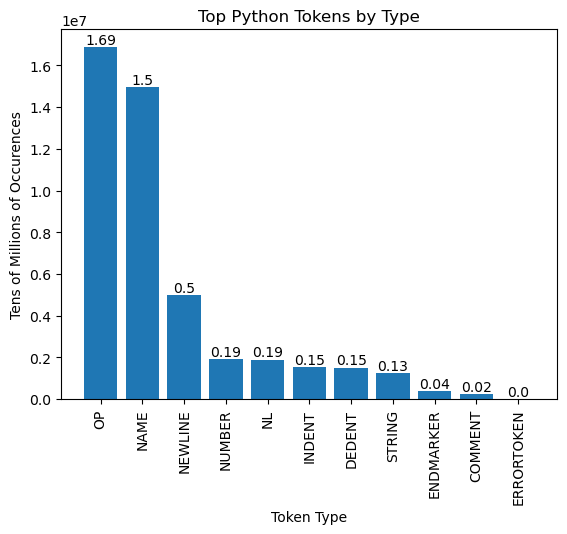

In [56]:
fig, ax = plt.subplots()
p = ax.bar([i[0] for i in srt_type], [i[1] for i in srt_type])
ax.set_title("Top Python Tokens by Type")
ax.set_xlabel("Token Type")
ax.set_ylabel("Tens of Millions of Occurences")
plt.xticks(rotation='vertical')
ax.bar_label(p, labels=[round(i[1]/10000000, 2) for i in srt_type], label_type = "edge")
plt.show()

Then, we will check what are the most common tokens in the code uploaded by students

In [57]:
srt_str[:10]

[('\n', 6104711),
 ('(', 2954003),
 (')', 2950957),
 ('=', 2125259),
 ('', 1995613),
 (':', 1837955),
 ('.', 1672050),
 ('i', 1087501),
 (',', 1073868),
 ('[', 1044302)]

) missing from current font.\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


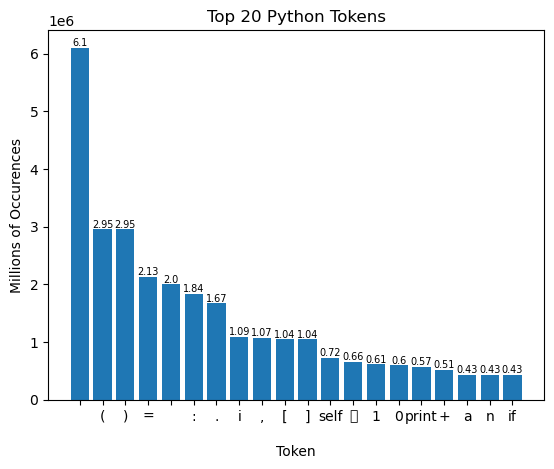

In [58]:
fig, ax = plt.subplots()
p = ax.bar([i[0] for i in srt_str[:20]], [i[1] for i in srt_str[:20]])
ax.set_title("Top 20 Python Tokens")
ax.set_xlabel("Token")
ax.set_ylabel("Millions of Occurences")
ax.bar_label(p, labels=[round(i[1]/1000000, 2) for i in srt_str[:20]], label_type = "edge", fontsize=7)
plt.show()

We will profile the rest of the data quickly using ydata profiler

In [59]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 353.0/353.0 kB 21.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [60]:
from ydata_profiling import ProfileReport

In [61]:
#df_code_py = pd.read_parquet('df_code_py.gzip')

In [62]:
profile = ProfileReport(df_code_py[df_code_py.columns.difference(["upload", "tokens", "token_code_only"])], title="Python Code Upload Profile")

In [63]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]